In [1]:
import os
import numpy as np
import pandas as pd
import json
import jax
import jax.numpy as jnp
from tqdm import tqdm
import yaml
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
train_unfocused = pd.read_csv("/home/houtlaw/iono-net/data/baselines/10k_lownoise/test_image_recon_jnp_unfocused.csv").map(complex)
train_focused = pd.read_csv("/home/houtlaw/iono-net/data/baselines/10k_lownoise/test_image_recon_jnp.csv").map(complex)
x_range = pd.read_csv("/home/houtlaw/iono-net/data/baselines/10k_lownoise/x_range_image_recon_jnp.csv").values

In [3]:
train_focused.shape

(1500, 941)

In [4]:
sample_row = train_focused.iloc[0,:]
print(sample_row)

0      0.023089+0.000670j
1      0.014073+0.006684j
2      0.001553+0.007930j
3     -0.009961+0.003632j
4     -0.017034-0.002465j
              ...        
936   -0.051450+0.039413j
937   -0.065915+0.029943j
938   -0.068267+0.014262j
939   -0.058230-0.001593j
940   -0.037583-0.014044j
Name: 0, Length: 941, dtype: complex128


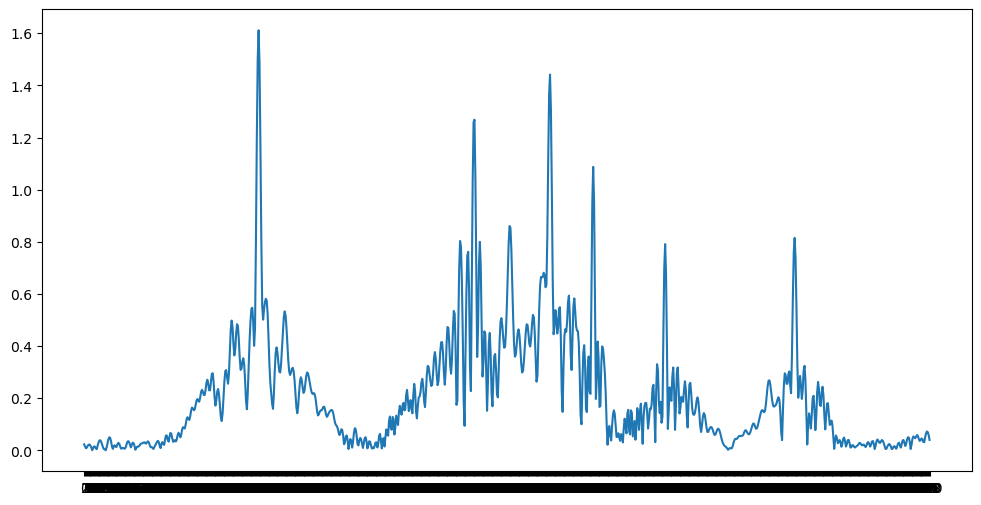

In [5]:
plt.figure(figsize=(12,6))
plt.plot(np.abs(sample_row))

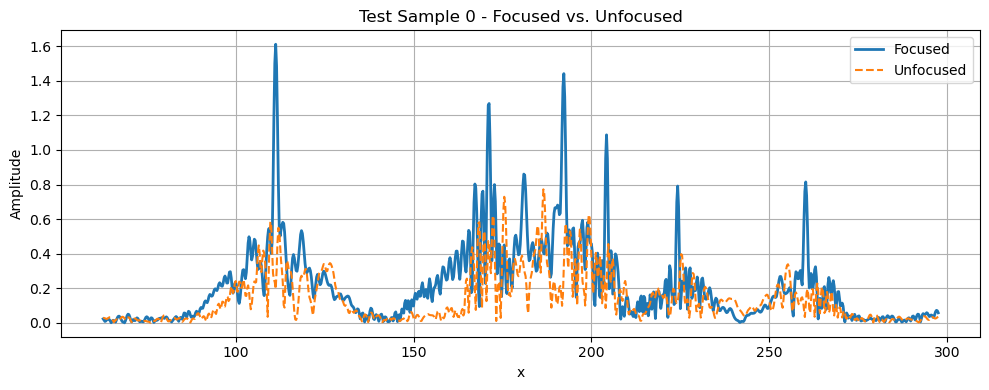

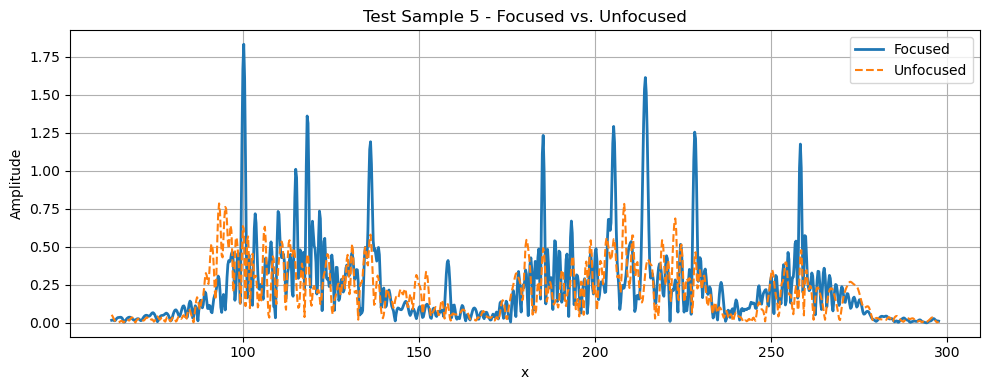

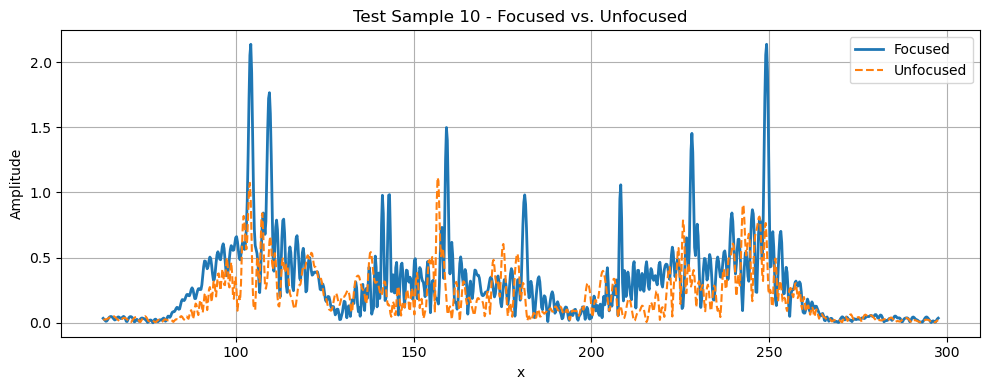

In [6]:

# Load trimmed x_range
with open("/home/houtlaw/iono-net/model/config_image.yaml", "r") as f:
    import yaml, json
    config = yaml.safe_load(f)
with open(config['paths']['setup_file_path']) as f:
    setup = json.load(f)
F = 100


# Choose test indices to plot
indices = [0, 5, 10]

for idx in indices:
    plt.figure(figsize=(10, 4))
    plt.plot(x_range.reshape(-1,1), np.abs(train_focused.values[idx])[:-1], label="Focused", linewidth=2)
    plt.plot(x_range.reshape(-1,1), np.abs(train_unfocused.values[idx])[:-1], label="Unfocused", linestyle="--")
    plt.title(f"Test Sample {idx} - Focused vs. Unfocused")
    plt.xlabel("x")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()